In [0]:
from scipy.io import mmread
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import os

In [142]:
from google.colab import drive
drive.mount('/content/drive')

print(os.getcwd())
os.chdir("/content/drive/My Drive/COMS4995_FinalProject")
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/COMS4995_FinalProject


'/content/drive/My Drive/COMS4995_FinalProject'

In [0]:
annots_auxsiam = ["GM: 3' UTR", "GM: 5' UTR", 'GM: Distal Intergenic', 'GM: Downstream (1-2kb)',
                  'GM: Downstream (2-3kb)', 'GM: Downstream (<1kb)', 'GM: Exon', 'GM: Intron', 
                  'GM: Promoter (1-2kb)', 'GM: Promoter (2-3kb)', 'GM: Promoter (<=1kb)',
                  "K562: 3' UTR", "K562: 5' UTR", 'K562: Distal Intergenic', 'K562: Downstream (1-2kb)',
                  'K562: Downstream (2-3kb)', 'K562: Downstream (<1kb)', 'K562: Exon', 'K562: Intron', 
                  'K562: Promoter (1-2kb)', 'K562: Promoter (2-3kb)', 'K562: Promoter (<=1kb)']

In [0]:
K562_rna = pd.read_csv('data/gm_full.expr.csv', sep = ',', names = ("GeneID", "count"))
GM_rna = pd.read_csv('data/k562_full.expr.csv', sep = ',', names = ("GeneID", "count"))
fullSC_cv = pd.read_csv('Results/gm_full_k562_full/gm_full_k562_full_aux_siamese/gm_k562_SC_80ep.csv', 
                        sep = ',', index_col = 0, names = annots_auxsiam)

In [0]:
# basic differential log2fold change
# log2(FC) = log2(B) - log2(A)
# B -- K562
# A -- GM12878
# differential threshold: |log2(FC)| > 8.0 ---- original DeepDiff Experiment used this cutoff

# GM12878 - K562: w.r.t K562 (B)
# add pesudo count 1, no log2(0)

k562_pc = np.array(K562_rna["count"] + 1)
gm_pc = np.array(GM_rna["count"] + 1) 
gm_k562_lfc = pd.DataFrame(list(zip(GM_rna["GeneID"], (np.log2(gm_pc) - np.log2(k562_pc)))), columns = ["Gene", "count"]) # log2fold w.r.t k562

In [192]:
# log2fold for genes in results
fullSC_l2f = gm_k562_lfc[gm_k562_lfc["Gene"].isin(fullSC_cv.index.values)]

gm_att = fullSC_cv.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
k562_att = fullSC_cv.iloc[:, [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]]
print(np.mean(gm_att, axis = 0), "\n\n", np.mean(k562_att, axis = 0))

GM: 3' UTR                0.023683
GM: 5' UTR                0.058038
GM: Distal Intergenic     0.143600
GM: Downstream (1-2kb)    0.122003
GM: Downstream (2-3kb)    0.124035
GM: Downstream (<1kb)     0.123368
GM: Exon                  0.137215
GM: Intron                0.107258
GM: Promoter (1-2kb)      0.064586
GM: Promoter (2-3kb)      0.050640
GM: Promoter (<=1kb)      0.045573
dtype: float64 

 K562: 3' UTR                0.005123
K562: 5' UTR                0.103185
K562: Distal Intergenic     0.235553
K562: Downstream (1-2kb)    0.145400
K562: Downstream (2-3kb)    0.034156
K562: Downstream (<1kb)     0.023146
K562: Exon                  0.180445
K562: Intron                0.217971
K562: Promoter (1-2kb)      0.037265
K562: Promoter (2-3kb)      0.008223
K562: Promoter (<=1kb)      0.009533
dtype: float64


In [0]:
gmk_min = fullSC_l2f[abs(fullSC_l2f["count"]) != 0] 
gmk_1 = fullSC_l2f[abs(fullSC_l2f["count"]) > 1.0]  
gmk_15 = fullSC_l2f[abs(fullSC_l2f["count"]) > 1.5] 
gmk_5 = fullSC_l2f[abs(fullSC_l2f["count"]) > 5.0]  
gmk_8 = fullSC_l2f[abs(fullSC_l2f["count"]) > 8.0]  

In [0]:
K_up_min = gmk_min[gmk_min["count"] > 0]
K_down_min = gmk_min[gmk_min["count"] < 0]

K_up_15 = gmk_15[gmk_15["count"] > 1.5]
K_down_15 = gmk_15[gmk_15["count"] < -1.5]

K_up_5 = gmk_5[gmk_5["count"] > 5]
K_down_5 = gmk_5[gmk_5["count"] < -5]

K_up_8 = gmk_8[gmk_8["count"] > 8]
K_down_8 = gmk_8[gmk_8["count"] < -8]

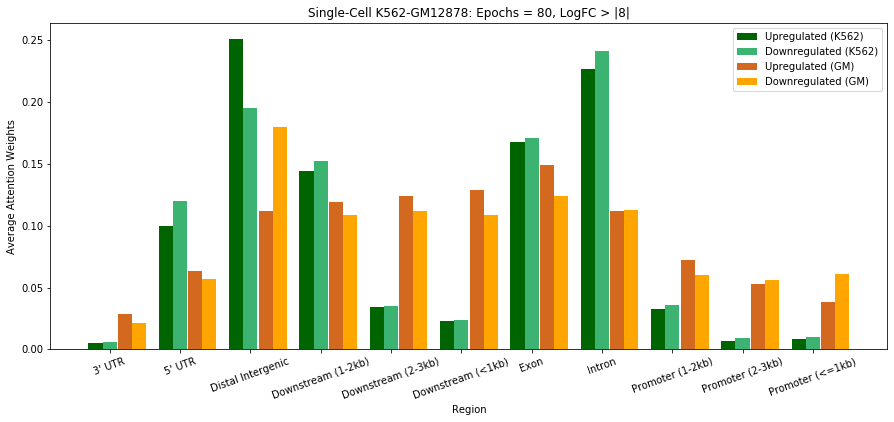

In [197]:
## Upregulated K562 relative to gm
annots = ["3' UTR", "5' UTR", 'Distal Intergenic', 'Downstream (1-2kb)',
          'Downstream (2-3kb)', 'Downstream (<1kb)', 'Exon', 'Intron', 
          'Promoter (1-2kb)', 'Promoter (2-3kb)', 'Promoter (<=1kb)']
i = np.arange(len(annots))
bar_width = 0.2

# Plot Cutoff > 0 weights
fig1, ax1 = plt.subplots(figsize = (15, 6))
plt.bar(i, k562_att.loc[K_up_8["Gene"]].mean(axis = 0), color = 'darkgreen', label = "Upregulated (K562)", width = 0.2)
plt.bar(i + bar_width, k562_att.loc[K_down_8["Gene"]].mean(axis = 0), color = 'mediumseagreen', label = "Downregulated (K562)", width = 0.2)
plt.bar(i + bar_width + 0.22, gm_att.loc[K_down_8["Gene"]].mean(axis = 0), color = "chocolate", label = "Upregulated (GM)", width = 0.2)
plt.bar(i + bar_width + bar_width + 0.22, gm_att.loc[K_up_8["Gene"]].mean(axis = 0), color = 'orange', label = "Downregulated (GM)", width = 0.2)


plt.xlabel("Region")
plt.ylabel("Average Attention Weights")
plt.title("Single-Cell K562-GM12878: Epochs = 80, LogFC > |8|")
plt.xticks(i + bar_width, annots, rotation = 20)
plt.legend(loc = "upper right")
plt.savefig('Plots/GM12878_K562_SC_auxsiamese_80ep_8FC.png')
plt.show()

In [139]:
up_k = len(k562_att.loc[K_up_8["Gene"]])
up_gm = len(gm_att.loc[K_up_8["Gene"]])
up_len = up_k + up_gm

down_k = len(k562_att.loc[K_down_8["Gene"]])
down_gm = len(gm_att.loc[K_down_8["Gene"]])
down_len = down_k + down_gm

np.divide(np.array(k562_att.loc[K_up_8["Gene"]].sum(axis = 0)) + np.array(gm_att.loc[K_up_8["Gene"]].sum(axis = 0)), up_len)

array([0.08529289, 0.18848101, 0.11455537, 0.09709576, 0.05982849,
       0.06855508, 0.08514464, 0.10427233, 0.06972067, 0.07139056,
       0.05566321])

In [140]:
np.divide(np.array(k562_att.loc[K_down_8["Gene"]].sum(axis = 0)) + np.array(gm_att.loc[K_down_8["Gene"]].sum(axis = 0)), down_len)

array([0.09145943, 0.19114845, 0.10327851, 0.10220911, 0.06512904,
       0.07070142, 0.08066621, 0.10249276, 0.06976784, 0.06949029,
       0.05365694])

In [0]:
## Upregulated K562 relative to gm
annots = ["3' UTR", "5' UTR", 'Distal Intergenic', 'Downstream (1-2kb)',
          'Downstream (2-3kb)', 'Downstream (<1kb)', 'Exon', 'Intron', 
          'Promoter (1-2kb)', 'Promoter (2-3kb)', 'Promoter (<=1kb)']
i = np.arange(len(annots))
bar_width = 0.2

# Plot Cutoff > 0 weights
fig1, ax1 = plt.subplots(figsize = (15, 6))
plt.bar(i, k562_att.loc[K_up_8["Gene"]].mean(axis = 0), color = 'darkgreen', label = "Upregulated (K562)", width = 0.2)
plt.bar(i + bar_width, k562_att.loc[K_down_8["Gene"]].mean(axis = 0), color = 'mediumseagreen', label = "Downregulated (K562)", width = 0.2)
plt.bar(i + bar_width + 0.22, gm_att.loc[K_down_8["Gene"]].mean(axis = 0), color = "chocolate", label = "Upregulated (GM)", width = 0.2)
plt.bar(i + bar_width + bar_width + 0.22, gm_att.loc[K_up_8["Gene"]].mean(axis = 0), color = 'orange', label = "Downregulated (GM)", width = 0.2)


plt.xlabel("Region")
plt.ylabel("Average Attention Weights")
plt.title("Avg. Attention Weights K562-GM12878: LogFC > |8|")
plt.xticks(i + bar_width, annots, rotation = 20)
plt.legend(loc = "upper right")
# plt.savefig('Plots/GM12878_K562_bulk_auxsiamese_40ep_8FC.png')
plt.show()